In [1]:
import numpy as np
from astropy.coordinates import EarthLocation, Angle
import matplotlib as mpl
import matplotlib.style as mplstyle
mplstyle.use('fast')
import matplotlib.pyplot as plt


## Purpose of the notebook:

Numerically compare the results from the two-screen derivation with Sprenger 2022. 

## Import relevant functions that follow from Sprenger 2022

In [2]:
import sys
import os

# Get the parent directory path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add it to sys.path
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    
path1 = '/cita/h/home-2/montalvo/Pyspace/Scintillometry/interactions/tims/Scinter3/examples' 
sys.path.append(path1)
path1 = '/cita/h/home-2/montalvo/Pyspace/Scintillometry/interactions/tims/Scinter3' 
sys.path.append(path1)   
    
import astropy.units as u
import astropy.constants as const

# sys.path.insert(0,scinter3_path)
import scinter_computation
import scinter_plot

#some constants in SI units
mus = 1.0e-6
sqrtmus = np.sqrt(mus)
hour = 3600.
vm_scale = hour/sqrtmus

# sys.path.insert(0,scinter3_path)
import scinter_data
import scinter_plot
import scinter_computation

#reproducible random values
rng = np.random.default_rng(12345)

#some constants in SI units
au = 149597870700. #m
pc = 648000./np.pi*au #m
day = 24*3600
year = 365.2425*day
degrees = np.pi/180.
mas = degrees/1000./3600.
v_c = 299792458. #m/s
MHz = 1.0e+6
GHz = 1.0e+6
mHz = 1.0e-3
musec = 1.0e-6
mus = 1.0e-6
e = 1.602176634e-19 #C
me = 9.1093837015e-31 #kg
eps0 = 8.8541878128e-12 #SI
pc_per_cm3 = pc/0.01**3
hour = 3600.
minute = 60.
kms = 1000.
f_DM = -e**2/(4.*np.pi*eps0*me*v_c)*pc_per_cm3


#some constants in SI units
degrees = np.pi/180.
mas = degrees/1000./3600.
hour = 3600.
year = 365.25*24.*hour
au = 149597870700. #m
pc = 648000./np.pi*au #m
v_c = 299792458.
minute = 60.
day = 24.*hour
mHz = 1.0e-3
MHz = 1.0e+6
GHz = 1.0e+9
mus = 1.0e-6
sqrtmus = np.sqrt(mus)
kms = 1000.
vm_scale = hour/sqrtmus

## Set the physical params (using B0834)

In [3]:
D_s = 620.
PMRA = 2.2
PMDEC = 51.6

telescope =  EarthLocation(2390487.080, -5564731.357, 1994720.633, unit="m") #AO
psrname = 'PSRB0834+06'

#screen distances
D_x = 389
D_y = 415

#screen orientations
a_x = -(154.8 - 90)
a_y = -(46.1-90 )

#screen velocities
V_x = 23.1
V_y = -44 



# V_y = -46.48
a_Vx = 0.


#obs frequency
nu0 = 318*MHz
def eta_from_zeta(zeta):
    return 1./(2.*nu0*zeta)**2


#for hengrui
mjds = np.linspace(53374. , 53374. + 1,num=1)


### compute the velocity of the telescope at the observation times
screen = scinter_computation.Evolution_Two1DScreens(mjds,psrname,telcoords=telescope)
SP = scinter_computation.Two1DScreens(D_x=D_x,D_y=D_y,D_s=D_s,a_x=a_x,a_y=a_y,V_x=V_x,V_y=V_y,PMRA=PMRA,PMDEC=PMDEC)
zetas = screen.compute(D_s=D_s,PMRA=PMRA,PMDEC=PMDEC,D_x=D_x,D_y=D_y,a_x=a_x,a_y=a_y,V_x=V_x,V_y=V_y)



## Set the physical params (using 1508)

In [4]:
# D_s = 2100.
# PMRA = -73.64
# PMDEC = -62.65

# telescope =  EarthLocation(2390487.080, -5564731.357, 1994720.633, unit="m") #AO
# psrname = 'PSRB1508+55'

# #screen distances
# D_x = 127
# D_y = 1935

# #screen orientations
# a_x = -(53 - 90)
# a_y = -(129.7-90 )

# #screen velocities
# V_x = 7.3
# V_y = -6 



# # V_y = -46.48
# a_Vx = 0.


# #obs frequency
# nu0 = 1350*MHz
# def eta_from_zeta(zeta):
#     return 1./(2.*nu0*zeta)**2


# #for hengrui
# mjds = np.linspace(53374. , 53374. + 1,num=1)


# ### compute the velocity of the telescope at the observation times
# screen = scinter_computation.Evolution_Two1DScreens(mjds,psrname,telcoords=telescope)
# SP = scinter_computation.Two1DScreens(D_x=D_x,D_y=D_y,D_s=D_s,a_x=a_x,a_y=a_y,V_x=V_x,V_y=V_y,PMRA=PMRA,PMDEC=PMDEC)
# zetas = screen.compute(D_s=D_s,PMRA=PMRA,PMDEC=PMDEC,D_x=D_x,D_y=D_y,a_x=a_x,a_y=a_y,V_x=V_x,V_y=V_y)



In [5]:
# Compute curvatues that arise from these params

print("eta 1x = ", eta_from_zeta(zetas['zeta1_x'])[0])
print("eta 1y = ", eta_from_zeta(zetas['zeta1_y'])[0])
print("eta 2x = ", eta_from_zeta(zetas['zeta2_x'])[0])
print("eta 2y = ", eta_from_zeta(zetas['zeta2_y'])[0])

eta 1x =  0.6401942719110758
eta 1y =  0.4152297295478696
eta 2x =  1.4432311161323794
eta 2y =  0.6497011208302327


## Setting the same params from screens (orientation is defined differently)

In [6]:
from interactions_funcs import *

In [7]:
#distance, orientation (East of North) and transverse velocity for screen 1
d_s1_init = D_x * u.pc 
xi1_init = (-a_x + 90)*u.deg 
v1_init = V_x*u.km/u.s 


#distance, orientation (East of North) and transverse velocity for screen 2
d_s2_init = D_y *u.pc
xi2_init = (-a_y + 90)*u.deg
v2_init = V_y*u.km/u.s


#params for Earth (earth velocity vector in RA, DEC), then transformed into polar form
vtel_vec = get_vearth(psrname, mjds[0]) 
vearth = np.sqrt( np.dot(vtel_vec, vtel_vec ) )
e_angle = np.arctan2(vtel_vec[1] , vtel_vec[0]).to(u.deg)

#params for Pulsar (pulsar velocity vector in RA, DEC), then transformed into polar form
vpsr_init = ( D_s * u.pc * np.sqrt( PMDEC**2 + PMRA**2)  * u.mas / u.year / u.rad ).to(u.km / u.s)
dp_angle_init = ( np.arctan2( PMDEC , PMRA ) * u.rad ).to(u.deg)

In [8]:
#putting astropy unit to the frequency
obs_freq = nu0 / MHz * u.MHz

#computing curvatures from my derivation
eta1, ddeff1, dveff1 = screen_1d_curvature(d_p = D_s * u.pc, 
                    vpsr = vpsr_init, 
                    dp_angle = dp_angle_init, 
                    vearth = vearth, 
                    e_angle = e_angle, 
                    ds1 = d_s1_init, 
                    xi1 = xi1_init, 
                    v1 = v1_init, 
                    freq = obs_freq,
                    extra_info = True)

eta2, ddeff2, dveff2 = screen_1d_curvature(d_p = D_s * u.pc, 
                    vpsr = vpsr_init, 
                    dp_angle = dp_angle_init, 
                    vearth = vearth, 
                    e_angle = e_angle, 
                    ds1 = d_s2_init, 
                    xi1 = xi2_init, 
                    v1 = v2_init, 
                    freq = obs_freq,
                    extra_info = True)

eta_int1, eta_int2, _, _, _, _  = interaction_arcs(d_p = D_s * u.pc, 
                                        vpsr = vpsr_init, 
                                        dp_angle = dp_angle_init, 
                                        vearth = vearth, 
                                        e_angle = e_angle, 
                                        ds1 = d_s1_init, 
                                        xi1 = xi1_init, 
                                        v1 = v1_init, 
                                        ds2 = d_s2_init, 
                                        xi2 = xi2_init, 
                                        v2 = v2_init, 
                                        freq = obs_freq )

In [9]:
# Compute curvatues that arise from these params

print("eta 1x = ", eta1.value)
print("eta 1y = ", eta2.value)
print("eta 2x = ", eta_int1.value)
print("eta 2y = ", eta_int2.value)

eta 1x =  0.6402160713255227
eta 1y =  0.41523992563541745
eta 2x =  1.4432880729206885
eta 2y =  0.6497151739571939


## Assuming Sprenger 2022's values to the the 'real' values, compute the relative error from screens 

## Rel error $ = |\frac{\eta_{2022} - \eta_{screens}}{ \eta_{2022}}|$

In [10]:
def rel_error( a, b):
    return np.abs( (a - b) / a)

In [11]:
print("eta 1x = ", rel_error( eta_from_zeta(zetas['zeta1_x'])[0], eta1.value) )
print("eta 1y = ", rel_error( eta_from_zeta(zetas['zeta1_y'])[0], eta2.value) )
print("eta 2x = ", rel_error( eta_from_zeta(zetas['zeta2_x'])[0], eta_int1.value) )
print("eta 2y = ", rel_error( eta_from_zeta(zetas['zeta2_y'])[0], eta_int2.value) )

eta 1x =  3.405124882144873e-05
eta 1y =  2.455529270261526e-05
eta 2x =  3.946477294760408e-05
eta 2y =  2.1630141169027268e-05


## Now to cover a large parameter space to look for aggravating disprepancies

In [12]:
def curvature_returner_vectorized(D_s, PMRA, PMDEC, D_x, D_y, a_x, a_y, V_x, V_y, vtel_vec, freq):

    # Scalar parameters
    ds = D_s 
    dx = D_x 
    vx = V_x 

    # Array parameters (convert to array values)
    dy = D_y 
    vy = V_y 
    e1 = a_x * np.pi / 180
    e2 = a_y * np.pi / 180

    # Useful quantities
    dxs = ds - dx
    dys = ds - dy

    d = np.cos(e1 - e2)
    s = np.sin(e1 - e2)
    den = (dy * dxs - dx * dys * d**2)

    # Pulsar velocity vector (fixed)
    V_s_ra = (PMRA * ds * u.pc * u.mas / u.yr / u.rad).to(u.km/u.s).value
    V_s_dec = (PMDEC * ds * u.pc * u.mas / u.yr / u.rad).to(u.km/u.s).value
    V_s_vec = np.array([V_s_ra, V_s_dec])  # shape (2,)

    # Observer velocity vector
    vtel_vec_val = vtel_vec.to(u.km/u.s).value  # shape (2,)

    # Anisotropy axes (arrays)
    uv_x_par = np.stack([np.cos(e1), np.sin(e1)], axis=-1)  # shape (N, 2)
    uv_x_ort = np.stack([-np.sin(e1), np.cos(e1)], axis=-1)
    uv_y_par = np.stack([np.cos(e2), np.sin(e2)], axis=-1)
    uv_y_ort = np.stack([-np.sin(e2), np.cos(e2)], axis=-1)

    # Projections
    vpp = np.sum(uv_x_par * vtel_vec_val[None, :], axis=1)
    vpo = np.sum(uv_x_ort * vtel_vec_val[None, :], axis=1)
    vsp = np.sum(uv_y_par * V_s_vec[None, :], axis=1)
    vso = np.sum(uv_y_ort * V_s_vec[None, :], axis=1)
    

    # Effective distances
    Deff2x = ds * dy * dx / den
    Deff2y = ds * dxs * dy**2 / (dys * den)

    # Effective velocities (2 screen)
    Veff2x = (
        -ds * dy * vx
        + d * dx * ds * vy
        + s * d * dx * dys * vpo
        + s * dx * dy * vso
    ) / den + vpp

    Veff2y = (
        -ds * dxs * dy / dys * vy
        + d * dy * ds * vx
        - s * dy * dxs * vpo
        - s * d * dx * dy * vso
    ) / den + dy / dys * vsp

    # Effective distances (1 screen)
    Deff1x = ds * dx / dxs
    Deff1y = ds * dy / dys

    # Effective velocities (1 screen)
    dx_val = dx
    dxs_val = dxs
    dy_val = dy
    dys_val = dys

    factor_x = dx_val / dxs_val
    factor_y = dy_val / dys_val

    Veff1x_vec = vtel_vec_val + factor_x * V_s_vec
    Veff1y_vec = vtel_vec_val + factor_y[:, None] * V_s_vec
    
    Veff1x = np.dot(Veff1x_vec, np.array([np.cos(e1), np.sin(e1)])) - ds / dxs * vx
    Veff1y = np.einsum("ij,ij->i", Veff1y_vec, uv_y_par) - ds/dys * vy

    # Frequencies
    nu_mean = np.mean(freq.to(u.Hz).value)

    # Curvatures
    eta1x = (Deff1x * u.pc * const.c / 2 / (u.km / u.s * Veff1x)**2 / np.mean(freq)**2).to(u.s**3).value
    eta1y = (Deff1y * u.pc * const.c / 2 / (u.km / u.s * Veff1y)**2 / np.mean(freq)**2).to(u.s**3).value
    eta2x = (Deff2x * u.pc * const.c / 2 / (u.km / u.s * Veff2x)**2 / np.mean(freq)**2).to(u.s**3).value
    eta2y = (Deff2y * u.pc * const.c / 2 / (u.km / u.s * Veff2y)**2 / np.mean(freq)**2).to(u.s**3).value

    return (eta1x, eta1y), (eta2x, eta2y)


In [13]:
np.random.seed(12345)
N = int(1e5)

dy_arr = np.random.uniform(low= D_x, high=D_s, size=N)
ay_arr = np.random.uniform(low=-180, high=0, size=N)
vy_arr = np.random.uniform(low=-1000, high=1000, size=N)

In [14]:
#calculation from Sprenger 2022

vtel_vec_0 = SP.get_vtel(mjds[0],psrname) / 1e3 * u.km / u.s
nu = np.linspace(nu0 / MHz - 0.5,nu0 / MHz + 0.5, 3000) * 1e6

(eta1x_tim, eta1y_tim), (eta2x_tim, eta2y_tim) = curvature_returner_vectorized(D_s=D_s,PMRA=PMRA,PMDEC=PMDEC,D_x=D_x,D_y=dy_arr,
                              a_x=a_x,a_y=ay_arr,
                              V_x=V_x,V_y=vy_arr, vtel_vec=vtel_vec_0, freq = nu.mean() * u.Hz)

In [15]:
eta2, ddeff2, dveff2 = screen_1d_curvature(d_p = D_s * u.pc, 
                    vpsr = vpsr_init, 
                    dp_angle = dp_angle_init, 
                    vearth = vearth, 
                    e_angle = e_angle, 
                    ds1 = dy_arr * u.pc, 
                    xi1 = (-ay_arr + 90)*u.deg, 
                    v1 = vy_arr * u.km / u.s, 
                    freq = obs_freq,
                    extra_info = True)

eta_int1, eta_int2, _, _, _, _  = interaction_arcs(d_p = D_s * u.pc, 
                                        vpsr = vpsr_init, 
                                        dp_angle = dp_angle_init, 
                                        vearth = vearth, 
                                        e_angle = e_angle, 
                                        ds1 = d_s1_init, 
                                        xi1 = xi1_init, 
                                        v1 = v1_init, 
                                        ds2 = dy_arr * u.pc, 
                                        xi2 = (-ay_arr + 90)*u.deg, 
                                        v2 = vy_arr * u.km / u.s, 
                                        freq = obs_freq )

In [16]:
## eta 1y error
eta1y_err = rel_error( eta1y_tim, eta2.value)

## eta 2x error
eta2x_err = rel_error( eta2x_tim, eta_int1.value)

## eta 2y error
eta2y_err = rel_error( eta2y_tim, eta_int2.value)

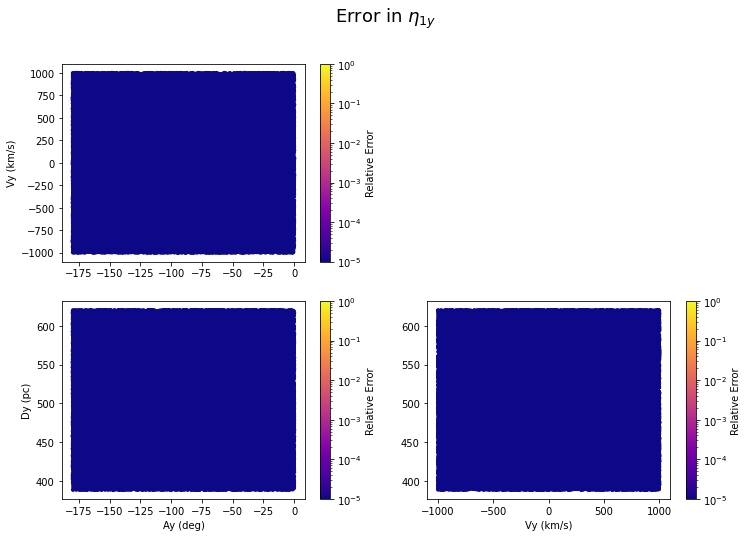

In [18]:
import matplotlib.colors as mcolors
norm = mcolors.LogNorm(vmin=1e-5, vmax=1e0)

plt.figure(figsize=(12, 8))

plt.subplot(2,2,1)
sc = plt.scatter(ay_arr, vy_arr, c=eta1y_err, cmap='plasma', norm=norm, s = 10)
plt.colorbar(sc, label="Relative Error")
# plt.xlabel("ay")
plt.ylabel("Vy (km/s)")

plt.subplot(2,2,3)
sc = plt.scatter(ay_arr, dy_arr, c=eta1y_err, cmap='plasma', norm=norm, s = 10)
plt.colorbar(sc, label="Relative Error")
plt.xlabel("Ay (deg)")
plt.ylabel("Dy (pc)")

plt.subplot(2,2,4)
sc = plt.scatter(vy_arr, dy_arr, c=eta1y_err, cmap='plasma', norm=norm, s = 10)
plt.colorbar(sc, label="Relative Error")
plt.xlabel("Vy (km/s)")
# plt.ylabel("dy")

plt.suptitle("Error in $\eta_{1y}$", fontsize = 18)

plt.show()

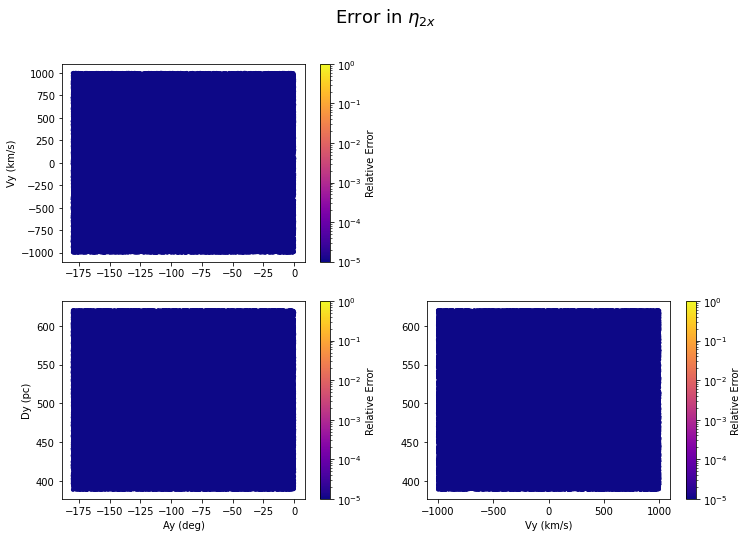

In [19]:
import matplotlib.colors as mcolors
norm = mcolors.LogNorm(vmin=1e-5, vmax=1e0)

plt.figure(figsize=(12, 8))

plt.subplot(2,2,1)
sc = plt.scatter(ay_arr, vy_arr, c=eta2x_err, cmap='plasma', norm=norm, s = 10)
plt.colorbar(sc, label="Relative Error")
# plt.xlabel("ay")
plt.ylabel("Vy (km/s)")

plt.subplot(2,2,3)
sc = plt.scatter(ay_arr, dy_arr, c=eta2x_err, cmap='plasma', norm=norm, s = 10)
plt.colorbar(sc, label="Relative Error")
plt.xlabel("Ay (deg)")
plt.ylabel("Dy (pc)")

plt.subplot(2,2,4)
sc = plt.scatter(vy_arr, dy_arr, c=eta2x_err, cmap='plasma', norm=norm, s = 10)
plt.colorbar(sc, label="Relative Error")
plt.xlabel("Vy (km/s)")
# plt.ylabel("dy")

plt.suptitle("Error in $\eta_{2x}$", fontsize = 18)

plt.show()

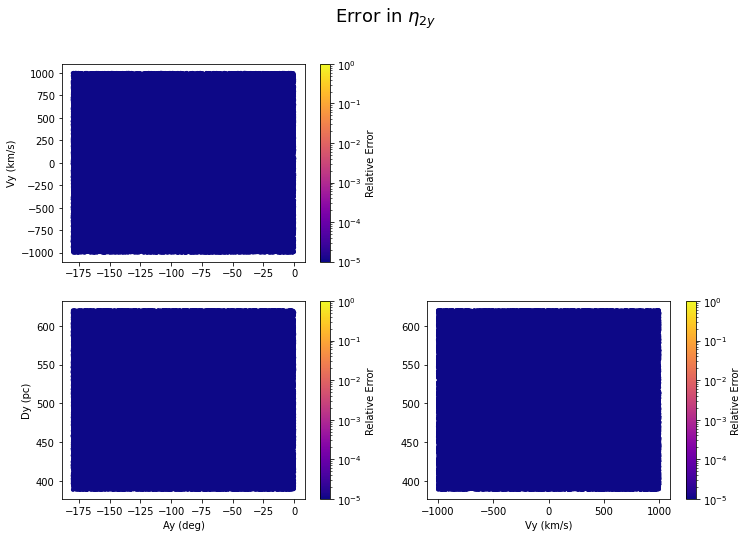

In [20]:
import matplotlib.colors as mcolors
norm = mcolors.LogNorm(vmin=1e-5, vmax=1e0)

plt.figure(figsize=(12, 8))

plt.subplot(2,2,1)
sc = plt.scatter(ay_arr, vy_arr, c=eta2y_err, cmap='plasma', norm=norm, s = 10)
plt.colorbar(sc, label="Relative Error")
# plt.xlabel("ay")
plt.ylabel("Vy (km/s)")

plt.subplot(2,2,3)
sc = plt.scatter(ay_arr, dy_arr, c=eta2y_err, cmap='plasma', norm=norm, s = 10)
plt.colorbar(sc, label="Relative Error")
plt.xlabel("Ay (deg)")
plt.ylabel("Dy (pc)")

plt.subplot(2,2,4)
sc = plt.scatter(vy_arr, dy_arr, c=eta2y_err, cmap='plasma', norm=norm, s = 10)
plt.colorbar(sc, label="Relative Error")
plt.xlabel("Vy (km/s)")
# plt.ylabel("dy")

plt.suptitle("Error in $\eta_{2y}$", fontsize = 18)

plt.show()